In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import fpl_functions as fpl
pd.options.mode.chained_assignment = None
sns.set_theme()

In [3]:
GAMEWEEKS_PLAYED = 3

After 3 gameweeks played, I currently sit in the top 14 million of global players, or the top 14%. We are heading into an international break, and the next gameweek won't be until Septembre 14, making this a good time to re-evaluate my team. I have not made any transfers thus far, despite the early injury to Solanke after gameweek 1, now having 3 free transfers saved. Besides Solanke, my team has no major "fires" to put out, so to say. And given that Solanke is likely to return after the international break, it may make sense at this point to continue holding him. After a tough fixture against Arsenal at Home, Spurs have a very favourable run of fixtures.

The major consideration for my team at this point is the issue of Salah. Salah has managed to match Haaland's total of 41 points after 3 gameweeks, despite Haaland having 2 back-to-back hattricks in this period. The teams that selected both, and made shrewd decisions on their budget options, are likely the ones leading in points at the moment. So the questions I'm asking myself are should I bring Salah into my team, and if so, how?

My answer to the first question is almost certainly yes. Given Salah's next three favourable fixtures (Forest at Home, Bournemouth at Home, Wolves Away) and Haaland playing Arsenal in Gameweek 5 (a fixture he blanked twice in last season), Salah seems like a must have for this period. A captain choice of Haaland Gameweek 5 while a vast majority are captaining Salah will most certainly result in a massive rank loss. The only other resonable hedge I could see against this is bringing Palmer into my team and captaining him for his away game to West Ham that week. The main advantage of selecting Palmer is that he is 2m cheaper than Salah at the moment, requiring less sacrifices to slot him into my team. This question will be answered as part of the analysis below.

And so given that I am very likely to bring Salah (or possibly Palmer) into my team, the next question to answer will be 'how?'. Saka (10.6m) -> Salah (12.6m) seemed like the most elegant solution initially, but not one I was particularly fond of due to Saka performing well, and I do believe he will return against Spurs next game. However, given the imminent price rises that will occur over this lengthy break, it may be my only option, as there may be no way to upgrade from Jota (7.6) to Salah with taking a hit (a -4 point deduction for going over my alloted free transfers for the week). Additionaly, Saka will be on the other end of the Man City - Arsenal game in 2 week, and I also don't feel a large, or any, returns coming from him that week. All of this makes a Saka -> Salah move the most tempting for this week. Afterwards, I would consider a wildcard in Gameweek 6 to bring Saka back into my team (Saka may also have some price drops from now until then, further facilitating the move).

In [4]:
df = pd.read_excel('data/players_Gameweek_{}.xlsx'.format(GAMEWEEKS_PLAYED))
fixtures = pd.read_excel('data/fixtures.xlsx')
my_team = pd.read_excel('data/my_team_Gameweek_{}.xlsx'.format(GAMEWEEKS_PLAYED))

In [5]:
df.head()

,event_points,now_cost,points_per_game,selected_by_percent,status,team,total_points,web_name,minutes,goals_scored,...,penalties_order,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,starts_per_90,clean_sheets_per_90,position
0,0,54,0.0,0.0,u,Arsenal,0,Fábio Vieira,0,0,...,4.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,Midfielder
1,0,68,0.0,0.9,i,Arsenal,0,G.Jesus,5,0,...,NaN,0.00,0.0,0.00,0.00,2.70,0.00,0.0,0.00,Forward
2,2,60,4.7,12.6,a,Arsenal,14,Gabriel,270,0,...,NaN,0.08,0.0,0.02,0.10,1.19,0.33,1.0,0.67,Defender
3,8,81,7.3,18.0,a,Arsenal,22,Havertz,270,2,...,3.0,0.48,0.0,0.04,0.52,1.19,0.33,1.0,0.67,Forward
4,0,40,0.0,0.1,u,Arsenal,0,Hein,0,0,...,NaN,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,Goalkeeper


In [6]:
my_team

,Players,multiplier,is_captain,is_vice_captain
0,Henderson,1,False,False
1,Pedro Porro,1,False,False
2,Robinson,1,False,False
3,Alexander-Arnold,1,False,False
4,Eze,1,False,False
5,Hudson-Odoi,1,False,False
6,Diogo J.,1,False,False
7,Saka,1,False,True
8,Sangaré,1,False,False
9,Isak,1,False,False


In [7]:
df.drop(df[df['status'] == 'u'].index, inplace=True)

df['now_cost'] = df['now_cost']/10

#create points per million (cost) column (ppm)
df['ppm'] = round(df['total_points']/df['now_cost'], 2)

#create expected goal involvements vs actual goal involvements column
df['gi_vs_xgi'] = df['goals_scored'] + df['assists'] - df['expected_goal_involvements']

df['goal_involvements'] = df['goals_scored'] + df['assists']

df['points_per_minute'] = df['total_points']/df['minutes']

df['gc_vs_xgc'] = df['goals_conceded'] - df['expected_goals_conceded']

df['percent_of_season_played'] = np.round(df['minutes']/(GAMEWEEKS_PLAYED*90) * 100, 2)

#expected goal involvements per million; could this be a good way to determine which players are "undervalued"?
df['xgi_pm'] = round(df['expected_goal_involvements']/df['now_cost'], 2)

In [8]:
fixtures_going_forward = fixtures.loc[fixtures['Gameweek'] > GAMEWEEKS_PLAYED]

df['next_match'] = df['team'].apply(lambda x: list(fpl.fixtures_by_team(fixtures, x, GAMEWEEKS_PLAYED+1)[['opponent', 'h_or_a']].iloc[-1]))
df['next_5_FDRs'] = df['team'].apply(lambda x: list(fpl.fixtures_by_team(fixtures_going_forward, x, GAMEWEEKS_PLAYED+5)['FDR']))
#df['past_3_FDRs'] = df['team'].apply(lambda x: list(fpl.fixtures_by_team(fixtures, x, GAMEWEEKS_PLAYED)['FDR']))
df['next_5_avg_FDRs'] = df['next_5_FDRs'].apply(lambda x: np.mean(x))
#df['past_3_avg_FDRs'] = df['past_3_FDRs'].apply(lambda x: np.mean(x))

In [9]:
fpl.get_team(df, list(my_team.loc[my_team['multiplier'] > 0]['Players']))

,web_name,position,team,now_cost,selected_by_percent,percent_of_season_played,ppm,xgi_pm,next_match,next_5_avg_FDRs,goals_scored,assists,goal_involvements,clean_sheets,expected_goal_involvements,gi_vs_xgi,expected_goal_involvements_per_90,total_points
405,Haaland,Forward,Man City,15.2,65.1,99.63,2.7,0.26,"[Brentford, Home]",3.0,7.0,0.0,7.0,1.0,3.93,3.07,1.31,41.0
13,Saka,Midfielder,Arsenal,10.1,32.8,94.81,2.38,0.20,"[Spurs, Away]",3.0,1.0,3.0,4.0,2.0,2.02,1.98,0.71,24.0
366,Alexander-Arnold,Defender,Liverpool,7.0,30.2,82.22,2.86,0.24,"[Nott'm Forest, Home]",2.4,0.0,0.0,0.0,3.0,1.70,-1.70,0.68,20.0
371,Diogo J.,Midfielder,Liverpool,7.6,18.8,82.96,2.24,0.23,"[Nott'm Forest, Home]",2.4,1.0,1.0,2.0,3.0,1.72,0.28,0.69,17.0
461,Isak,Forward,Newcastle,8.5,44.5,100.0,1.88,0.16,"[Wolves, Away]",3.0,1.0,1.0,2.0,1.0,1.38,0.62,0.46,16.0
572,Pedro Porro,Defender,Spurs,5.5,35.2,100.0,2.91,0.17,"[Arsenal, Home]",2.8,1.0,0.0,1.0,1.0,0.93,0.07,0.31,16.0
217,Eze,Midfielder,Crystal Palace,6.9,24.6,100.0,2.03,0.19,"[Leicester, Home]",2.8,1.0,0.0,1.0,0.0,1.33,-0.33,0.44,14.0
289,Robinson,Defender,Fulham,4.6,16.0,100.0,2.83,0.04,"[West Ham, Home]",3.0,0.0,2.0,2.0,0.0,0.18,1.82,0.06,13.0
497,Hudson-Odoi,Midfielder,Nott'm Forest,5.4,2.6,88.89,1.48,0.16,"[Liverpool, Away]",3.0,0.0,0.0,0.0,2.0,0.85,-0.85,0.32,8.0
219,Henderson,Goalkeeper,Crystal Palace,4.5,14.6,100.0,1.56,0.00,"[Leicester, Home]",2.8,0.0,0.0,0.0,0.0,0.00,0.00,0.00,7.0


### Fixtures

Taking a quick look ahead at the fixtures to come. Here's the fixture difficulty rating (FDR) matrix for the next 5 gameweeks, sorted by average difficulty from least to greatest:

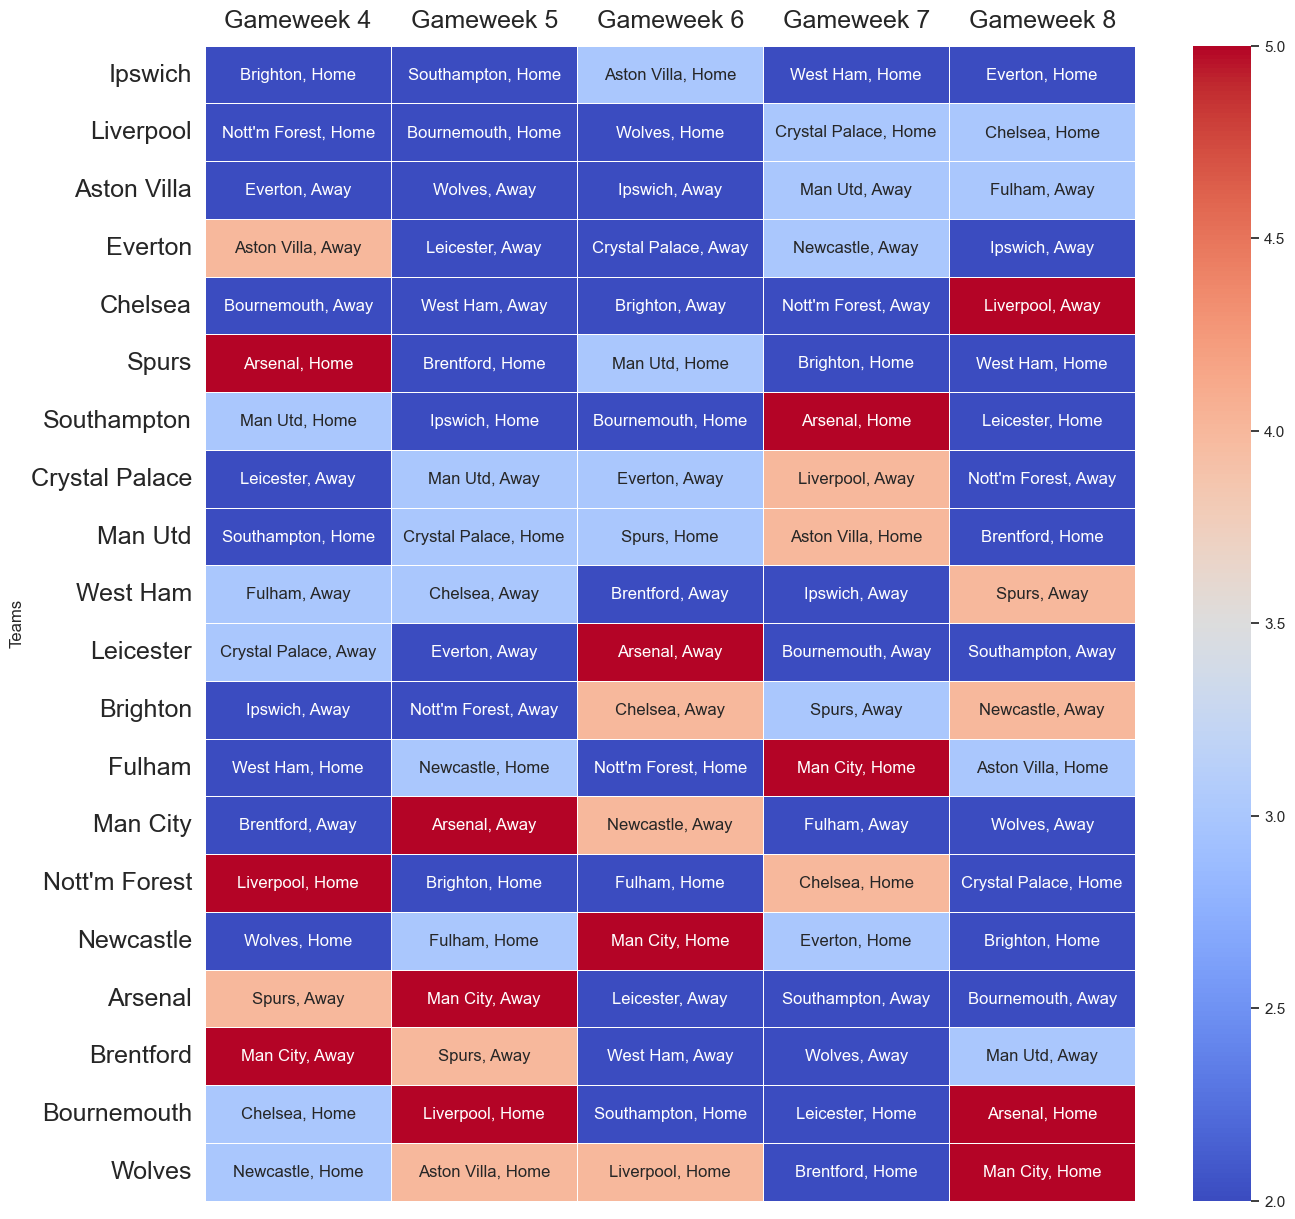

In [187]:
pl_teams = fixtures['team_h'].unique()
fixture_matrix_fdr = pd.DataFrame({'Teams': pl_teams})
fixture_matrix_fdr['next_5_fdr'] = fixture_matrix_fdr['Teams'].apply(lambda x: fpl.fixtures_by_team(fixtures_going_forward, x, GAMEWEEKS_PLAYED+5)['FDR'].mean())
fixture_matrix_fdr.sort_values(by='next_5_fdr', ascending=True, inplace=True)
fixture_matrix_fdr.drop('next_5_fdr', axis=1, inplace=True)

fixture_matrix_matches = fixture_matrix_fdr.copy()

for i in range(GAMEWEEKS_PLAYED, GAMEWEEKS_PLAYED+5):
    gw_fix = []
    for team in fixture_matrix_fdr['Teams'].values:
        fdr = fpl.fixtures_by_team(fixtures_going_forward, team, GAMEWEEKS_PLAYED+5)['FDR'].values[i-GAMEWEEKS_PLAYED]
        gw_fix.append(fdr)
    fixture_matrix_fdr['Gameweek {}'.format(i+1)] = gw_fix

for i in range(GAMEWEEKS_PLAYED, GAMEWEEKS_PLAYED+5):
    gw_fix = []
    for team in fixture_matrix_fdr['Teams'].values:
        opponent = fpl.fixtures_by_team(fixtures_going_forward, team, GAMEWEEKS_PLAYED+5)['opponent'].values[i-GAMEWEEKS_PLAYED]
        h_or_a = fpl.fixtures_by_team(fixtures_going_forward, team, GAMEWEEKS_PLAYED+5)['h_or_a'].values[-1]
        gw_fix.append('{}, {}'.format(opponent, h_or_a))
    fixture_matrix_matches['Gameweek {}'.format(i+1)] = gw_fix

fig, ax = plt.subplots(figsize=(15,15)) 
ax = sns.heatmap(fixture_matrix_fdr.set_index('Teams'), annot=fixture_matrix_matches.set_index('Teams'), fmt='', linewidth=.5, cmap='coolwarm')
plt.tick_params(axis='both', which='major', labelsize=18, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.show()

Ipswich have the kindest fixtures for the next 5 gameweeks, which is interesting to consider. Because on the one hand, Ipswich do appear to have no FPL assets worth considering and have not had an impressive showing in the opening first 3 fixtures. But on the other hand, 2 of their first three fixtures were Man City and Liverpool. There is a chance that any Ipswich assets will become more noticeable in the coming gameweeks with their kinder fixture run. Something worth noting for now, but likely not worth acting on. The analysis for the underlying numbers can also give us a better sense of any overlooked assets on their squad.

Liverpool, Aston Villa, and Chelsea's fixtures are the ones worth noting, as they are the teams with the most prominent FPL assets. Salah, Watkins, and Palmer, who play for each team mentioned respectively, were 3 of the highest scoring players from last season.

Out of curiosity, I want to see what the average number of goals scored at each FDR rating (i.e. for all teams playing a fixture with an FDR rating of 3, what is the average number of goals they all scored). Let's look at this for all of the first 3 gameweek matches.

In [188]:
first_three_fixtures = pd.DataFrame()
for i in pl_teams:
    temp = fpl.fixtures_by_team(fixtures, i, GAMEWEEKS_PLAYED)
    first_three_fixtures = pd.concat([first_three_fixtures, temp])

<AxesSubplot:xlabel='FDR', ylabel='Goals Scored'>

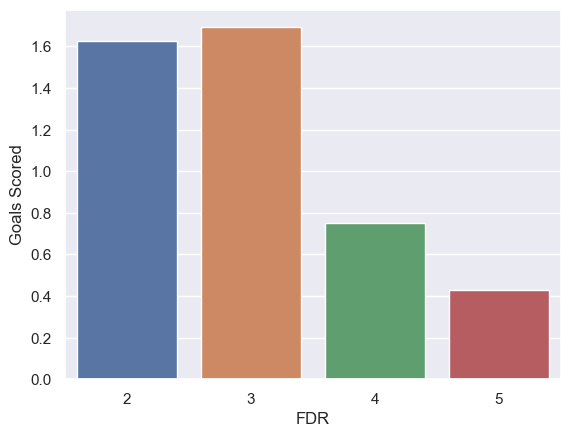

In [208]:
sns.barplot(data=pd.DataFrame(first_three_fixtures.groupby('FDR')['selected_team_score'].mean()).reset_index().rename(columns={'selected_team_score': 'Goals Scored'}),
             x='FDR', y='Goals Scored')

### Goalkeepers

Henderson has been a disapointing pick for me. Crystal Palace looked very solid defensively towards the end of last season, however at the moment they are looking to be one of the more favourable opponents to have. 

Henderson currently sits 4th for most expected goals conceded so far, and has made 10 saves. In comparison, equally priced Flekken is second for expected goals conceded, but has still conceded less goals, and made 17 saves.

In [10]:
fpl.top_players(df, 'Goalkeeper', 'expected_goals_conceded', False, 10)

,web_name,team,now_cost,selected_by_percent,bps,percent_of_season_played,ppm,xgi_pm,next_match,next_5_avg_FDRs,clean_sheets,saves,goals_conceded,expected_goals_conceded,gc_vs_xgc,total_points
259,Pickford,Everton,4.9,11.1,2,100.00,0.82,0.0,"[Aston Villa, Away]",2.6,0,9,10,6.08,3.92,4
99,Flekken,Brentford,4.5,11.1,56,100.00,2.22,0.0,"[Man City, Away]",3.2,0,17,4,5.39,-1.39,10
473,Pope,Newcastle,5.0,8.8,57,100.00,3.20,0.0,"[Wolves, Away]",3.0,1,12,2,5.26,-3.26,16
219,Henderson,Crystal Palace,4.5,14.6,24,100.00,1.56,0.0,"[Leicester, Home]",2.8,0,10,5,5.25,-0.25,7
593,Areola,West Ham,4.5,8.5,31,83.33,1.78,0.0,"[Fulham, Away]",2.8,1,6,4,5.09,-1.09,8
343,Hermansen,Leicester,4.5,0.5,36,100.00,1.56,0.0,"[Crystal Palace, Away]",2.8,0,12,5,4.56,0.44,7
325,Muric,Ipswich,4.4,0.4,0,66.67,0.68,0.0,"[Brighton, Away]",2.2,0,4,5,4.29,0.71,3
440,Onana,Man Utd,5.0,5.2,38,100.00,1.60,0.0,"[Southampton, Away]",2.8,1,4,5,4.26,0.74,8
47,Martinez,Aston Villa,5.0,13.1,33,100.00,1.20,0.0,"[Everton, Home]",2.4,0,7,4,3.78,0.22,6
584,Vicario,Spurs,5.0,3.9,50,100.00,1.80,0.0,"[Arsenal, Home]",2.8,1,4,3,3.59,-0.59,9


In [11]:
num_of_goalies = df.loc[df['position'] == 'Goalkeeper'].shape[0]
goalies = fpl.top_players(df, 'Goalkeeper', 'expected_goals_conceded', False, num_of_goalies)
goalies.groupby('team')[['clean_sheets', 'saves', 'goals_conceded', 'expected_goals_conceded', 'gc_vs_xgc']].sum().sort_values(by='expected_goals_conceded', ascending=False).reset_index()

,team,clean_sheets,saves,goals_conceded,expected_goals_conceded,gc_vs_xgc
0,Ipswich,0,7,7,6.94,0.06
1,Arsenal,2,20,3,6.49,-3.49
2,West Ham,1,8,5,6.38,-1.38
3,Everton,0,9,10,6.08,3.92
4,Southampton,0,11,5,5.48,-0.48
5,Brentford,0,17,4,5.39,-1.39
6,Newcastle,1,12,2,5.26,-3.26
7,Crystal Palace,0,10,5,5.25,-0.25
8,Leicester,0,12,5,4.56,0.44
9,Man Utd,1,4,5,4.26,0.74


In [184]:
pd.concat([fpl.fixtures_by_team(fixtures, 'Man City', 3), fpl.fixtures_by_team(fixtures, 'Arsenal', 3),fpl.fixtures_by_team(fixtures, 'Liverpool', 3)])

,Gameweek,kickoff_date,kickoff_time,selected_team,selected_team_score,opponent,opponent_score,FDR,h_or_a
8,1,2024-08-18,15:30:00,Man City,2.0,Chelsea,0.0,4,Away
13,2,2024-08-24,14:00:00,Man City,4.0,Ipswich,1.0,2,Home
26,3,2024-08-31,16:30:00,Man City,3.0,West Ham,1.0,2,Away
2,1,2024-08-17,14:00:00,Arsenal,2.0,Wolves,0.0,2,Home
16,2,2024-08-24,16:30:00,Arsenal,2.0,Aston Villa,0.0,4,Away
20,3,2024-08-31,11:30:00,Arsenal,1.0,Brighton,1.0,2,Home
1,1,2024-08-17,11:30:00,Liverpool,2.0,Ipswich,0.0,2,Away
19,2,2024-08-25,15:30:00,Liverpool,2.0,Brentford,0.0,2,Home
29,3,2024-09-01,15:00:00,Liverpool,3.0,Man Utd,0.0,3,Away


### Defenders

In [12]:
fpl.top_players(df, 'Defender', 'expected_goal_involvements', False, 10)

,web_name,team,now_cost,selected_by_percent,bps,percent_of_season_played,ppm,xgi_pm,next_match,next_5_avg_FDRs,...,assists,goal_involvements,expected_goal_involvements,gi_vs_xgi,expected_goal_involvements_per_90,clean_sheets,goals_conceded,expected_goals_conceded,gc_vs_xgc,total_points
366,Alexander-Arnold,Liverpool,7.0,30.2,77,82.22,2.86,0.24,"[Nott'm Forest, Home]",2.4,...,0,0,1.70,-1.70,0.68,3,0,1.60,-1.60,20
513,Milenković,Nott'm Forest,4.5,0.2,26,66.67,1.78,0.22,"[Liverpool, Away]",3.0,...,0,0,1.00,-1.00,0.50,1,1,0.88,0.12,8
575,Romero,Spurs,5.1,9.6,74,100.00,3.33,0.19,"[Arsenal, Home]",2.8,...,0,1,0.97,0.03,0.33,1,3,3.59,-0.59,17
572,Pedro Porro,Spurs,5.5,35.2,55,100.00,2.91,0.17,"[Arsenal, Home]",2.8,...,0,1,0.93,0.07,0.31,1,3,3.53,-0.53,16
545,Sugawara,Southampton,4.5,0.2,40,76.30,2.22,0.18,"[Man Utd, Home]",2.8,...,0,1,0.82,0.18,0.36,0,5,5.17,-0.17,10
409,Lewis,Man City,4.6,7.5,55,100.00,3.04,0.17,"[Brentford, Home]",3.0,...,1,1,0.78,0.22,0.26,1,2,2.03,-0.03,14
389,Robertson,Liverpool,6.0,6.0,78,92.59,3.00,0.12,"[Nott'm Forest, Home]",2.4,...,0,0,0.69,-0.69,0.25,3,0,2.11,-2.11,18
404,Gvardiol,Man City,6.0,29.8,59,98.89,1.83,0.11,"[Brentford, Home]",3.0,...,0,0,0.64,-0.64,0.21,1,2,1.94,0.06,11
246,Coleman,Everton,4.4,0.0,-1,33.33,0.23,0.14,"[Aston Villa, Away]",2.6,...,0,0,0.63,-0.63,0.63,0,3,2.22,0.78,1
618,Aït-Nouri,Wolves,4.5,2.5,0,77.41,0.89,0.14,"[Newcastle, Home]",3.6,...,1,1,0.62,0.38,0.27,0,8,2.84,5.16,4


### Midfielders

In [13]:
fpl.top_players(df, 'Midfielder', 'expected_goal_involvements', False, 10)

,web_name,team,now_cost,selected_by_percent,bps,percent_of_season_played,ppm,xgi_pm,next_match,next_5_avg_FDRs,goals_scored,assists,goal_involvements,expected_goal_involvements,gi_vs_xgi,expected_goal_involvements_per_90,total_points
399,De Bruyne,Man City,9.6,11.1,82,98.52,1.67,0.29,"[Brentford, Home]",3.0,1,1,2,2.76,-0.76,0.93,16
382,M.Salah,Liverpool,12.6,40.7,132,97.04,3.25,0.22,"[Nott'm Forest, Home]",2.4,3,3,6,2.73,3.27,0.93,41
82,Semenyo,Bournemouth,5.6,4.6,68,100.00,3.39,0.45,"[Chelsea, Home]",3.4,2,1,3,2.51,0.49,0.83,19
381,Luis Díaz,Liverpool,7.6,14.2,109,83.70,4.21,0.33,"[Nott'm Forest, Home]",2.4,3,1,4,2.49,1.51,0.99,32
86,Tavernier,Bournemouth,5.5,0.3,52,97.78,2.36,0.42,"[Chelsea, Home]",3.4,1,0,1,2.30,-1.30,0.78,13
423,B.Fernandes,Man Utd,8.4,12.5,41,95.56,0.83,0.25,"[Southampton, Away]",2.8,0,0,0,2.11,-2.11,0.74,7
13,Saka,Arsenal,10.1,32.8,84,94.81,2.38,0.20,"[Spurs, Away]",3.0,1,3,4,2.02,1.98,0.71,24
571,Maddison,Spurs,7.5,4.7,63,87.78,1.60,0.26,"[Arsenal, Home]",2.8,0,2,2,1.93,0.07,0.73,12
198,Palmer,Chelsea,10.6,42.1,108,97.04,2.36,0.18,"[Bournemouth, Away]",2.6,1,4,5,1.89,3.11,0.65,25
107,Mbeumo,Brentford,7.1,7.5,105,99.63,3.38,0.26,"[Man City, Away]",3.2,3,0,3,1.84,1.16,0.61,24


In [14]:
fpl.top_players(df, 'Midfielder', 'xgi_pm', False, 10)

,web_name,team,now_cost,selected_by_percent,bps,percent_of_season_played,ppm,xgi_pm,next_match,next_5_avg_FDRs,goals_scored,assists,goal_involvements,expected_goal_involvements,gi_vs_xgi,expected_goal_involvements_per_90,total_points
82,Semenyo,Bournemouth,5.6,4.6,68,100.00,3.39,0.45,"[Chelsea, Home]",3.4,2,1,3,2.51,0.49,0.83,19
86,Tavernier,Bournemouth,5.5,0.3,52,97.78,2.36,0.42,"[Chelsea, Home]",3.4,1,0,1,2.30,-1.30,0.78,13
608,Souček,West Ham,5.0,3.3,38,66.67,2.80,0.34,"[Fulham, Away]",2.8,1,1,2,1.68,0.32,0.84,14
381,Luis Díaz,Liverpool,7.6,14.2,109,83.70,4.21,0.33,"[Nott'm Forest, Home]",2.4,3,1,4,2.49,1.51,0.99,32
255,McNeil,Everton,5.4,0.6,66,100.00,1.85,0.30,"[Aston Villa, Away]",2.6,0,1,1,1.63,-0.63,0.55,10
399,De Bruyne,Man City,9.6,11.1,82,98.52,1.67,0.29,"[Brentford, Home]",3.0,1,1,2,2.76,-0.76,0.93,16
148,Mitoma,Brighton,6.6,8.0,60,96.67,2.42,0.27,"[Ipswich, Home]",3.0,1,1,2,1.77,0.23,0.61,16
571,Maddison,Spurs,7.5,4.7,63,87.78,1.60,0.26,"[Arsenal, Home]",2.8,0,2,2,1.93,0.07,0.73,12
107,Mbeumo,Brentford,7.1,7.5,105,99.63,3.38,0.26,"[Man City, Away]",3.2,3,0,3,1.84,1.16,0.61,24
429,Garnacho,Man Utd,6.4,11.9,20,45.19,1.09,0.26,"[Southampton, Away]",2.8,0,1,1,1.64,-0.64,1.21,7


### Forwards

In [15]:
fpl.top_players(df, 'Forward', 'expected_goal_involvements', False, 10)

,web_name,team,now_cost,selected_by_percent,bps,percent_of_season_played,ppm,xgi_pm,next_match,next_5_avg_FDRs,goals_scored,assists,goal_involvements,expected_goal_involvements,gi_vs_xgi,expected_goal_involvements_per_90,total_points
405,Haaland,Man City,15.2,65.1,204,99.63,2.70,0.26,"[Brentford, Home]",3.0,7,0,7,3.93,3.07,1.31,41
118,Wissa,Brentford,6.1,7.6,90,90.74,3.44,0.39,"[Man City, Away]",3.2,2,1,3,2.36,0.64,0.87,21
196,N.Jackson,Chelsea,7.6,5.7,69,82.22,2.37,0.27,"[Bournemouth, Away]",2.6,2,1,3,2.05,0.95,0.83,18
626,Cunha,Wolves,6.5,2.6,58,70.37,1.38,0.28,"[Newcastle, Home]",3.6,1,0,1,1.79,-0.79,0.85,9
58,Watkins,Aston Villa,8.9,26.4,14,68.52,1.01,0.18,"[Everton, Home]",2.4,0,1,1,1.59,-0.59,0.77,9
3,Havertz,Arsenal,8.1,18.0,80,100.00,2.72,0.19,"[Spurs, Away]",3.0,2,1,3,1.55,1.45,0.52,22
509,Wood,Nott'm Forest,6.1,7.9,66,87.04,3.11,0.25,"[Liverpool, Away]",3.0,2,0,2,1.54,0.46,0.59,19
160,Welbeck,Brighton,5.7,13.8,82,93.33,4.04,0.26,"[Ipswich, Home]",3.0,2,1,3,1.48,1.52,0.52,23
461,Isak,Newcastle,8.5,44.5,62,100.00,1.88,0.16,"[Wolves, Away]",3.0,1,1,2,1.38,0.62,0.46,16
141,João Pedro,Brighton,5.7,26.8,84,96.67,3.16,0.20,"[Ipswich, Home]",3.0,2,0,2,1.14,0.86,0.39,18


In [180]:
fpl.top_players(df, 'Forward', 'xgi_pm', False, 10)

,web_name,team,now_cost,selected_by_percent,bps,percent_of_season_played,ppm,xgi_pm,next_match,next_5_avg_FDRs,goals_scored,assists,goal_involvements,expected_goal_involvements,gi_vs_xgi,expected_goal_involvements_per_90,total_points
118,Wissa,Brentford,6.1,7.6,90,90.74,3.44,0.39,"[Man City, Away]",3.2,2,1,3,2.36,0.64,0.87,21
626,Cunha,Wolves,6.5,2.6,58,70.37,1.38,0.28,"[Newcastle, Home]",3.6,1,0,1,1.79,-0.79,0.85,9
196,N.Jackson,Chelsea,7.6,5.7,69,82.22,2.37,0.27,"[Bournemouth, Away]",2.6,2,1,3,2.05,0.95,0.83,18
160,Welbeck,Brighton,5.7,13.8,82,93.33,4.04,0.26,"[Ipswich, Home]",3.0,2,1,3,1.48,1.52,0.52,23
405,Haaland,Man City,15.2,65.1,204,99.63,2.70,0.26,"[Brentford, Home]",3.0,7,0,7,3.93,3.07,1.31,41
509,Wood,Nott'm Forest,6.1,7.9,66,87.04,3.11,0.25,"[Liverpool, Away]",3.0,2,0,2,1.54,0.46,0.59,19
141,João Pedro,Brighton,5.7,26.8,84,96.67,3.16,0.20,"[Ipswich, Home]",3.0,2,0,2,1.14,0.86,0.39,18
3,Havertz,Arsenal,8.1,18.0,80,100.00,2.72,0.19,"[Spurs, Away]",3.0,2,1,3,1.55,1.45,0.52,22
58,Watkins,Aston Villa,8.9,26.4,14,68.52,1.01,0.18,"[Everton, Home]",2.4,0,1,1,1.59,-0.59,0.77,9
524,Armstrong,Southampton,5.5,1.4,6,75.93,0.73,0.17,"[Man Utd, Home]",2.8,0,0,0,0.92,-0.92,0.40,4


In [20]:
#I need 2.6 to upgrade Saka to Salah, funded by selling Isak. Currently on 0.5 itb, therefore I need a replacement that is 6.4 or lower
fpl.top_players_by_cost(df, 'Forward', 6.4, 'expected_goal_involvements', 10)

,web_name,team,now_cost,selected_by_percent,bps,percent_of_season_played,ppm,xgi_pm,next_match,next_5_avg_FDRs,goals_scored,assists,goal_involvements,expected_goal_involvements,gi_vs_xgi,expected_goal_involvements_per_90,total_points
118,Wissa,Brentford,6.1,7.6,90,90.74,3.44,0.39,"[Man City, Away]",3.2,2,1,3,2.36,0.64,0.87,21
509,Wood,Nott'm Forest,6.1,7.9,66,87.04,3.11,0.25,"[Liverpool, Away]",3.0,2,0,2,1.54,0.46,0.59,19
160,Welbeck,Brighton,5.7,13.8,82,93.33,4.04,0.26,"[Ipswich, Home]",3.0,2,1,3,1.48,1.52,0.52,23
141,João Pedro,Brighton,5.7,26.8,84,96.67,3.16,0.20,"[Ipswich, Home]",3.0,2,0,2,1.14,0.86,0.39,18
285,Muniz,Fulham,6.1,9.1,24,86.67,0.98,0.17,"[West Ham, Home]",3.0,0,0,0,1.05,-1.05,0.41,6
93,Evanilson,Bournemouth,6.0,0.3,10,50.00,0.67,0.17,"[Chelsea, Home]",3.4,0,0,0,1.02,-1.02,0.68,4
524,Armstrong,Southampton,5.5,1.4,6,75.93,0.73,0.17,"[Man Utd, Home]",2.8,0,0,0,0.92,-0.92,0.40,4
650,Strand Larsen,Wolves,5.5,0.9,43,95.56,1.82,0.16,"[Newcastle, Home]",3.6,1,0,1,0.86,0.14,0.30,10
38,Duran,Aston Villa,6.0,1.1,58,30.37,2.33,0.14,"[Everton, Home]",2.4,2,0,2,0.85,1.15,0.93,14
592,Antonio,West Ham,5.5,1.4,9,75.19,1.09,0.15,"[Fulham, Away]",2.8,0,0,0,0.83,-0.83,0.36,6


In [182]:
fpl.top_players_by_cost(df, 'Forward', 5.5, 'percent_of_season_played', 10)

,web_name,team,now_cost,selected_by_percent,bps,percent_of_season_played,ppm,xgi_pm,next_match,next_5_avg_FDRs,goals_scored,assists,goal_involvements,expected_goal_involvements,gi_vs_xgi,expected_goal_involvements_per_90,total_points
650,Strand Larsen,Wolves,5.5,0.9,43,95.56,1.82,0.16,"[Newcastle, Home]",3.6,1,0,1,0.86,0.14,0.30,10
307,Delap,Ipswich,5.5,0.7,35,87.04,2.00,0.04,"[Brighton, Away]",2.2,1,0,1,0.22,0.78,0.08,11
524,Armstrong,Southampton,5.5,1.4,6,75.93,0.73,0.17,"[Man Utd, Home]",2.8,0,0,0,0.92,-0.92,0.40,4
592,Antonio,West Ham,5.5,1.4,9,75.19,1.09,0.15,"[Fulham, Away]",2.8,0,0,0,0.83,-0.83,0.36,6
257,Ndiaye,Everton,5.4,0.2,10,52.59,0.74,0.07,"[Aston Villa, Away]",2.6,0,0,0,0.36,-0.36,0.23,4
334,Edouard,Leicester,5.4,0.6,3,42.59,0.56,0.08,"[Crystal Palace, Away]",2.8,0,0,0,0.42,-0.42,0.33,3
518,Archer,Southampton,5.0,1.6,11,30.37,0.60,0.04,"[Man Utd, Home]",2.8,0,0,0,0.21,-0.21,0.23,3
243,Beto,Everton,5.0,0.7,5,12.59,0.60,0.00,"[Aston Villa, Away]",2.6,0,0,0,0.00,0.00,0.00,3
286,Raúl,Fulham,5.4,0.4,11,12.22,0.56,0.01,"[West Ham, Home]",3.0,0,0,0,0.04,-0.04,0.11,3
299,Al-Hamadi,Ipswich,5.0,0.4,0,11.85,0.20,0.00,"[Brighton, Away]",2.2,0,0,0,0.02,-0.02,0.06,1
